In [60]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [61]:
seed = 21

In [62]:
from keras.datasets import cifar10

In [63]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [64]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [65]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [66]:
model = keras.Sequential()

In [67]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_56 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 16, 16, 64)      

In [68]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 10s 13ms/step - loss: 1.5481 - accuracy: 0.4472 - val_loss: 1.2485 - val_accuracy: 0.5553
Epoch 2/25
782/782 [==============================] - 10s 13ms/step - loss: 1.1079 - accuracy: 0.6089 - val_loss: 1.1272 - val_accuracy: 0.6083
Epoch 3/25
782/782 [==============================] - 10s 12ms/step - loss: 0.9619 - accuracy: 0.6644 - val_loss: 0.8725 - val_accuracy: 0.6897
Epoch 4/25
782/782 [==============================] - 9s 12ms/step - loss: 0.8664 - accuracy: 0.7004 - val_loss: 0.7257 - val_accuracy: 0.7455
Epoch 5/25
782/782 [==============================] - 9s 12ms/step - loss: 0.8058 - accuracy: 0.7232 - val_loss: 0.7501 - val_accuracy: 0.7418
Epoch 6/25
782/782 [==============================] - 9s 12ms/step - loss: 0.7581 - accuracy: 0.7385 - val_loss: 0.6475 - val_accuracy: 0.7734
Epoch 7/25
782/782 [==============================] - 9s 12ms/step - loss: 0.7203 - accuracy: 0.7535 - val_loss: 0.6496 - val_accuracy: 0.7

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.5178693532943726, 0.8238000273704529]

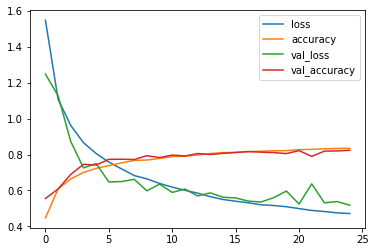

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()